
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive Simple Kriging Demonstration


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### The Interactive Workflow

Here's a simple workflow for calculating the simple kriging estimate and the estimation variance for a local uncertainty model

* we use a 'toy problem' with only 3 data for speed and interpretability of the results

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
\end{equation}

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
\end{equation}

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

\begin{equation}
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
\end{equation}

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

\begin{equation}
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
\end{equation}

while satisfying the unbaisedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
* **redundancy** the degree of spatial continuity between all of the available data with themselves 
* **closeness** the degree of spatial continuity between the avaiable data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

\begin{equation}
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
\end{equation}

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic. 
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - sample_data.csv at https://git.io/fh4gm.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python    

In [4]:
import matplotlib as plt2
plt2.__version__
import ipywidgets
np.__version__

'1.19.2'

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
%matplotlib inline
import os                                               # to set current working directory 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from matplotlib.pyplot import cm                        # color maps
from matplotlib.patches import Ellipse                  # plot an ellipse
import math                                             # sqrt operator
from scipy.stats import norm
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Simple, Simple Kriging Function

Let's write a fast Python function to take data points and unknown location and provide the:

* **simple kriging estimate**

* **simple kriging variance / estimation variance**

* **simple kriging weights**

This provides a fast method for small datasets, with less parameters (no search parameters) and the ability to see the simple kriging weights 

In [3]:
def simple_simple_krige(df, xcol, ycol, vcol, dfl, xlcol, ylcol, vario, skmean):
    # load the variogram
    nst = vario["nst"]
    pmx = 9999.9
    cc = np.zeros(nst)
    aa = np.zeros(nst)
    it = np.zeros(nst)
    ang = np.zeros(nst)
    anis = np.zeros(nst)
    nug = vario["nug"]
    sill = nug
    cc[0] = vario["cc1"]
    sill = sill + cc[0]
    it[0] = vario["it1"]
    ang[0] = vario["azi1"]
    aa[0] = vario["hmaj1"]
    anis[0] = vario["hmin1"] / vario["hmaj1"]
    if nst == 2:
        cc[1] = vario["cc2"]
        sill = sill + cc[1]
        it[1] = vario["it2"]
        ang[1] = vario["azi2"]
        aa[1] = vario["hmaj2"]
        anis[1] = vario["hmin2"] / vario["hmaj2"]

    # set up the required matrices
    rotmat, maxcov = geostats.setup_rotmat(nug, nst, it, cc, ang, pmx)
    ndata = len(df)
    a = np.zeros([ndata, ndata])
    r = np.zeros(ndata)
    s = np.zeros(ndata)
    rr = np.zeros(ndata)
    nest = len(dfl)

    est = np.zeros(nest)
    var = np.full(nest, sill)
    weights = np.zeros([nest, ndata])

    # Make and solve the kriging matrix, calculate the kriging estimate and variance
    for iest in range(0, nest):
        for idata in range(0, ndata):
            for jdata in range(0, ndata):
                a[idata, jdata] = geostats.cova2(
                    df[xcol].values[idata],
                    df[ycol].values[idata],
                    df[xcol].values[jdata],
                    df[ycol].values[jdata],
                    nst,
                    nug,
                    pmx,
                    cc,
                    aa,
                    it,
                    ang,
                    anis,
                    rotmat,
                    maxcov,
                )
            r[idata] = geostats.cova2(
                df[xcol].values[idata],
                df[ycol].values[idata],
                dfl[xlcol].values[iest],
                dfl[ylcol].values[iest],
                nst,
                nug,
                pmx,
                cc,
                aa,
                it,
                ang,
                anis,
                rotmat,
                maxcov,
            )
            rr[idata] = r[idata]

        s = geostats.ksol_numpy(ndata, a, r)
        sumw = 0.0
        for idata in range(0, ndata):
            sumw = sumw + s[idata]
            weights[iest, idata] = s[idata]
            est[iest] = est[iest] + s[idata] * df[vcol].values[idata]
            var[iest] = var[iest] - s[idata] * rr[idata]
        est[iest] = est[iest] + (1.0 - sumw) * skmean
    return est, var, weights

#### Interactive Simple Kriging Method

The following code includes:

* dashboard with variogram model data locations 

* plots of variogram model, data locations with point scaled by weights and uncertainty distribution at the unknown location

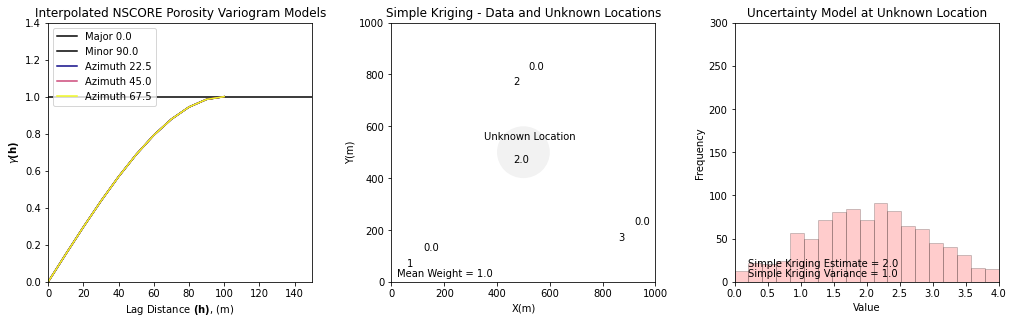

In [6]:
import warnings

warnings.simplefilter("ignore")

# interactive calculation of the sample set (control of source parametric distribution and number of samples)
style = {"description_width": "initial"}
l = widgets.Text(
    value="                                              Simple Kriging, Michael Pyrcz, Associate Professor, The University of Texas at Austin",
    layout=Layout(width="950px", height="30px"),
)
nug = widgets.FloatSlider(
    min=0,
    max=1.0,
    value=0.0,
    step=0.1,
    description="nug",
    orientation="vertical",
    layout=Layout(width="25px", height="200px"),
)
nug.style.handle_color = "gray"
it1 = widgets.Dropdown(
    options=["Spherical", "Exponential", "Gaussian"],
    value="Spherical",
    description="Type1:",
    disabled=False,
    layout=Layout(width="180px", height="30px"),
    style=style,
)

azi = widgets.FloatSlider(
    min=0,
    max=360,
    value=0,
    step=22.5,
    description="azi",
    orientation="vertical",
    layout=Layout(width="40px", height="200px"),
)
azi.style.handle_color = "gray"
hmaj1 = widgets.FloatSlider(
    min=0.01,
    max=10000.0,
    value=100.0,
    step=25.0,
    description="hmaj1",
    orientation="vertical",
    layout=Layout(width="40px", height="200px"),
)
hmaj1.style.handle_color = "gray"
hmin1 = widgets.FloatSlider(
    min=0.01,
    max=10000.0,
    value=100.0,
    step=25.0,
    description="hmin1",
    orientation="vertical",
    layout=Layout(width="40px", height="200px"),
)
hmin1.style.handle_color = "gray"
uikvar = widgets.HBox([nug, it1, azi, hmaj1, hmin1],)  # basic widget formatting

x1 = widgets.FloatSlider(
    min=0.0,
    max=1000.0,
    value=100.0,
    step=1.0,
    description="x1",
    orientation="horizontal",
    layout=Layout(width="180px", height="30px"),
    readout_format=".0f",
    style=style,
)
x1.style.handle_color = "blue"
y1 = widgets.FloatSlider(
    min=0.0,
    max=1000.0,
    value=100.0,
    step=1.0,
    description="y1",
    orientation="vertical",
    layout=Layout(width="90px", height="180px"),
    readout_format=".0f",
    style=style,
)
y1.style.handle_color = "blue"
uik1 = widgets.VBox([x1, y1],)

x2 = widgets.FloatSlider(
    min=0.0,
    max=1000.0,
    value=500.0,
    step=1.0,
    description="x2",
    orientation="horizontal",
    layout=Layout(width="180px", height="30px"),
    readout_format=".0f",
    style=style,
)
x2.style.handle_color = "red"
y2 = widgets.FloatSlider(
    min=0.0,
    max=1000.0,
    value=800.0,
    step=1.0,
    description="y2",
    orientation="vertical",
    layout=Layout(width="90px", height="180px"),
    readout_format=".0f",
    style=style,
)
y2.style.handle_color = "red"
uik2 = widgets.VBox([x2, y2],)

x3 = widgets.FloatSlider(
    min=0.0,
    max=1000.0,
    value=900.0,
    step=1.0,
    description="x3",
    orientation="horizontal",
    layout=Layout(width="180px", height="30px"),
    readout_format=".0f",
    style=style,
)
x3.style.handle_color = "green"
y3 = widgets.FloatSlider(
    min=0.0,
    max=1000.0,
    value=200.0,
    step=1.0,
    description="y3",
    orientation="vertical",
    layout=Layout(width="90px", height="180px"),
    readout_format=".0f",
    style=style,
)
y3.style.handle_color = "green"
uik3 = widgets.VBox([x3, y3],)

uipars = widgets.HBox([uikvar, uik1, uik2, uik3],)
uik = widgets.VBox([l, uipars],)


def convert_type(it):
    if it == "Spherical":
        return 1
    elif it == "Exponential":
        return 2
    else:
        return 3


def f_make_krige(
    nug, it1, azi, hmaj1, hmin1, x1, y1, x2, y2, x3, y3
):  # function to take parameters, make sample and plot
    text_trap = io.StringIO()
    sys.stdout = text_trap
    it1 = convert_type(it1)
    nst = 1
    xlag = 10
    nlag = int(hmaj1 / xlag)
    c1 = 1.0 - nug
    vario = GSLIB.make_variogram(
        nug, nst, it1, c1, azi, hmaj1, hmin1
    )  # make model object
    index_maj, h_maj, gam_maj, cov_maj, ro_maj = geostats.vmodel(
        nlag, xlag, azi, vario
    )  # project the model in the major azimuth                                                  # project the model in the 135 azimuth
    index_min, h_min, gam_min, cov_min, ro_min = geostats.vmodel(
        nlag, xlag, azi + 90.0, vario
    )  # project the model in the minor azimuth

    x = [x1, x2, x3]
    y = [y1, y2, y3]
    value = [1.0, 2.0, 3.0]
    df = pd.DataFrame({"X": x, "Y": y, "Value": value})

    xl = [500, 0, 1]
    yl = [500, 0, 1]
    value1 = [0, 0, 0]
    dfl = pd.DataFrame({"X": xl, "Y": yl, "Value": value1})

    sk_est, sk_var, sk_weights = simple_simple_krige(
        df, "X", "Y", "Value", dfl, "X", "Y", vario, skmean=2.0
    )
    if sk_var[0] == 0:
        sk_std = 0.0
    else:
        sk_std = math.sqrt(sk_var[0])

    xlag = 10.0
    nlag = int(hmaj1 / xlag)

    plt.subplot(1, 3, 1)
    plt.plot([0, hmaj1 * 1.5], [1.0, 1.0], color="black")
    plt.plot(h_maj, gam_maj, color="black", label="Major " + str(azi))
    plt.plot(h_min, gam_min, color="black", label="Minor " + str(azi + 90.0))
    deltas = [22.5, 45, 67.5]
    ndelta = len(deltas)
    hd = np.zeros(ndelta)
    gamd = np.zeros(ndelta)
    color = iter(cm.plasma(np.linspace(0, 1, ndelta)))
    for delta in deltas:
        index, hd, gamd, cov, ro = geostats.vmodel(nlag, xlag, azi + delta, vario)
        c = next(color)
        plt.plot(hd, gamd, color=c, label="Azimuth " + str(azi + delta))
    plt.xlabel(r"Lag Distance $\bf(h)$, (m)")
    plt.ylabel(r"$\gamma \bf(h)$")
    plt.title("Interpolated NSCORE Porosity Variogram Models")
    plt.xlim([0, hmaj1 * 1.5])
    plt.ylim([0, 1.4])
    plt.legend(loc="upper left")

    plt.subplot(1, 3, 2)
    plt.scatter(x1, y1, color="blue", edgecolors="black", s=sk_weights[0, 0] * 1000)
    plt.scatter(x2, y2, color="red", edgecolors="black", s=sk_weights[0, 1] * 1000)
    plt.scatter(x3, y3, color="green", edgecolors="black", s=sk_weights[0, 2] * 1000)
    scatter = plt.scatter(
        500, 500, color="gray", edgecolors="black", s=(1 - sk_std) * 1000
    )
    ax = plt.gca()
    plt.xlabel("X(m)")
    plt.ylabel("Y(m)")
    plt.title("Simple Kriging - Data and Unknown Locations")
    plt.xlim([0, 1000])
    plt.ylim([0, 1000])
    for i, txt in enumerate(np.round(sk_weights[0], 2)):
        plt.annotate(txt, (x[i] + 20, y[i] + 20))
    for i, txt in enumerate([1, 2, 3]):
        plt.annotate(txt, (x[i] - 40, y[i] - 40))
    plt.annotate(np.round(sk_est[0], 2), (500 - 40, 500 - 40))
    plt.annotate(
        "Mean Weight = " + str(np.round(1.0 - np.sum(sk_weights[0]), 2)), (20, 20)
    )
    plt.annotate("Unknown Location", (500 - 150, 500 + 50))

    ellipse = Ellipse(
        (500, 500),
        width=hmin1 * 2.0,
        height=hmaj1 * 2.0,
        angle=360 - azi,
        facecolor="gray",
        alpha=0.1,
    )
    ax = plt.gca()
    ax.add_patch(ellipse)

    samples = norm.rvs(sk_est[0], sk_std, 1000, random_state=73073)
    plt.subplot(1, 3, 3)
    plt.hist(
        samples, bins=np.linspace(0, 4.0, 20), alpha=0.2, color="red", edgecolor="black"
    )
    plt.xlim([0.0, 4.0])
    plt.ylim([0, 300])
    plt.title("Uncertainty Model at Unknown Location")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    ax = plt.gca()
    ax.annotate("Simple Kriging Estimate = " + str(np.round(sk_est[0], 2)), (0.2, 17.5))
    ax.annotate("Simple Kriging Variance = " + str(np.round(sk_var[0], 2)), (0.2, 6.5))
    plt.subplots_adjust(
        left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.3
    )
    plt.show()


# connect the function to make the samples and plot to the widgets
interactive_plot = widgets.interactive_output(
    f_make_krige,
    {
        "nug": nug,
        "it1": it1,
        "azi": azi,
        "hmaj1": hmaj1,
        "hmin1": hmin1,
        "x1": x1,
        "y1": y1,
        "x2": x2,
        "y2": y2,
        "x3": x3,
        "y3": y3,
    },
)
interactive_plot.clear_output(wait=True)  # reduce flickering by delaying plot updating

### Interactive Simple Kriging Demostration

* select the variogram model and the data locations and observe the outputs from simple kriging 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

Select the variogram model and the data locations:

* **nug**: nugget effect

* **c1 **: contributions of the sill

* **hmaj1 / hmin1 **: range in the major and minor direction

* **(x1, y1),...(x3,y3) **: spatial data locations  

In [5]:
display(uik, interactive_plot)                            # display the interactive plot

Output()

#### Comments

This was an interactive demonstration of simple kriging for spatial data analytics. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  